<a href="https://colab.research.google.com/github/kharanshu25/DS303-project/blob/main/Copy_of_DS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA VIEWING**

In [103]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [104]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [105]:
link = 'https://drive.google.com/file/d/1KsO1GRJA5vUan5LysQJe994LiEHRexHy/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Project_COVID_data.csv')  
  
df = pd.read_csv('Project_COVID_data.csv')

In [106]:
df.head()

FECHA_ACTUALIZACION Registration ID  ...  Result  ICU
0          01-05-2021          z482b8  ...      97   97
1          01-05-2021          z49a69  ...      97    1
2          01-05-2021          z23d9d  ...      97   97
3          01-05-2021          z24953  ...       2   97
4          01-05-2021          zz8e77  ...      97   97

[5 rows x 24 columns]

In [107]:
df.describe()

Sex  patient type  ...        Result           ICU
count  1.048575e+06  1.048575e+06  ...  1.048575e+06  1.048575e+06
mean   1.500119e+00  1.197140e+00  ...  1.473617e+01  7.895786e+01
std    5.000002e-01  3.978391e-01  ...  3.281308e+01  3.730277e+01
min    1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00
25%    1.000000e+00  1.000000e+00  ...  1.000000e+00  9.700000e+01
50%    2.000000e+00  1.000000e+00  ...  2.000000e+00  9.700000e+01
75%    2.000000e+00  1.000000e+00  ...  2.000000e+00  9.700000e+01
max    2.000000e+00  2.000000e+00  ...  9.700000e+01  9.900000e+01

[8 rows x 19 columns]

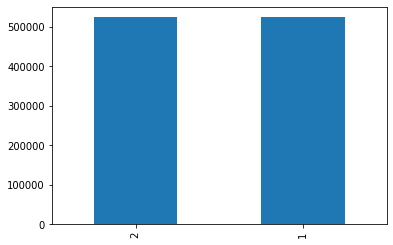

In [108]:
df["Sex"].value_counts().plot.bar()

In [109]:
df.isnull().sum()

FECHA_ACTUALIZACION            0
Registration ID                0
Sex                            0
patient type                   0
entry_date                     0
date_symptoms                  0
date_died                      0
Intubed                        0
Pneumonia                      0
Age                            0
PREGNANCY                      0
DIABETES                       0
COPD                           0
ASTHMA                         0
IMMUSUPR                       0
HYPERTENSION                   0
OTHER_DISEASE                  0
CARDIOVASCULAR                 0
OBESITY                        0
RENAL_CHRONIC                  0
TOBACISM                       0
Contact_OTHER_COVID_Pateint    0
Result                         0
ICU                            0
dtype: int64

In [110]:
df.shape

(1048575, 24)

## **DATA CLEANING**

In [111]:
df.drop(columns={'FECHA_ACTUALIZACION','date_died','date_symptoms','Registration ID', 'entry_date'},axis=1,inplace=True)
df.shape

(1048575, 19)

In [112]:
df

Sex  patient type  Intubed  ...  Contact_OTHER_COVID_Pateint  Result  ICU
0          2             1       97  ...                            2      97   97
1          1             2        1  ...                            1      97    1
2          2             1       97  ...                            2      97   97
3          1             1       97  ...                            1       2   97
4          2             1       97  ...                            2      97   97
...      ...           ...      ...  ...                          ...     ...  ...
1048570    2             1       97  ...                            1       1   97
1048571    1             2        2  ...                           99       1    2
1048572    1             1       97  ...                            2       1   97
1048573    1             1       97  ...                            1       2   97
1048574    1             1       97  ...                            1       2   97

[1048575 rows x 19 columns]

Result
2   458801
1   400516
97  143880
4    41363
3     4015

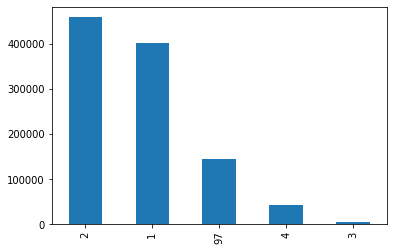

In [113]:
df["Result"].value_counts().plot.bar()
df["Result"].value_counts().to_frame()

In [114]:
df=df[df['Result']!=97]

In [115]:
df=df[df['Result']!=3]
df=df[df['Result']!=4]

In [116]:
df.head()

Sex  patient type  Intubed  ...  Contact_OTHER_COVID_Pateint  Result  ICU
3     1             1       97  ...                            1       2   97
6     1             1       97  ...                            2       2   97
8     2             1       97  ...                            2       1   97
9     1             1       97  ...                            1       2   97
11    1             1       97  ...                            1       2   97

[5 rows x 19 columns]

Result
2  458801
1  400516

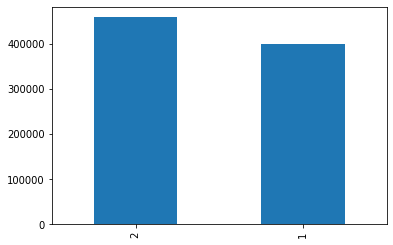

In [117]:
df["Result"].value_counts().plot.bar()
df["Result"].value_counts().to_frame()

In [118]:
df["ICU"].value_counts().to_frame()

ICU
97  680422
2   156507
1    15665
99    6723

In [121]:
df=df[df['ICU']!=97]
df=df[df['ICU']!=99]

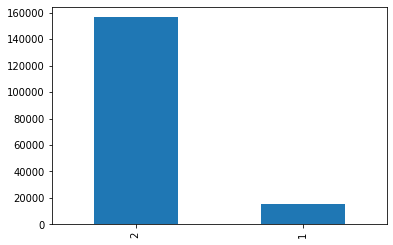

In [122]:
df["ICU"].value_counts().to_frame()
df["ICU"].value_counts().plot.bar()

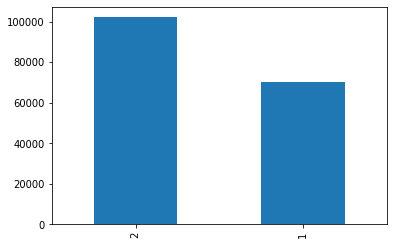

In [123]:
df["Sex"].value_counts().plot.bar()

In [124]:
df.describe()

Sex  patient type  ...         Result            ICU
count  172172.000000      172172.0  ...  172172.000000  172172.000000
mean        1.593052           2.0  ...       1.351288       1.909015
std         0.491266           0.0  ...       0.477374       0.287588
min         1.000000           2.0  ...       1.000000       1.000000
25%         1.000000           2.0  ...       1.000000       2.000000
50%         2.000000           2.0  ...       1.000000       2.000000
75%         2.000000           2.0  ...       2.000000       2.000000
max         2.000000           2.0  ...       2.000000       2.000000

[8 rows x 19 columns]

In [125]:
lst=df.columns
for i in range(19):
    print(df[lst[i]].value_counts().to_frame())

      Sex
2  102107
1   70065
   patient type
2        172172
    Intubed
2    141346
1     30824
99        2
   Pneumonia
1     106225
2      65947
      Age
56   4001
60   3881
59   3849
57   3786
61   3781
..    ...
109     2
105     2
115     1
106     1
118     1

[110 rows x 1 columns]
    PREGNANCY
97     102107
2       68174
1        1606
98        285
    DIABETES
2     120197
1      51102
98       873
      COPD
2   163879
1     7512
98     781
    ASTHMA
2   166991
1     4399
98     782
    IMMUSUPR
2     164986
1       6231
98       955
    HYPERTENSION
2         113339
1          58029
98           804
    OTHER_DISEASE
2          160511
1           10032
98           1629
    CARDIOVASCULAR
2           162648
1             8670
98             854
    OBESITY
2    135467
1     35897
98      808
    RENAL_CHRONIC
2          161192
1           10175
98            805
    TOBACISM
2     156781
1      14537
98       854
    Contact_OTHER_COVID_Pateint
99                       

In [126]:
for i in range(19):
  df=df[df[lst[i]]!=99]
  df=df[df[lst[i]]!=98]
  df=df[df[lst[i]]!=97]

     Sex
1  40380
   patient type
2         40380
   Intubed
2    34201
1     6179
   Pneumonia
1      24958
2      15422
     Age
57   856
56   837
0    830
61   826
60   825
..   ...
102    2
109    1
103    1
115    1
105    1

[104 rows x 1 columns]
   PREGNANCY
2      39337
1       1043
   DIABETES
2     28362
1     12018
    COPD
2  38548
1   1832
   ASTHMA
2   38966
1    1414
   IMMUSUPR
2     38744
1      1636
   HYPERTENSION
2         26877
1         13503
   OTHER_DISEASE
2          38307
1           2073
   CARDIOVASCULAR
2           38343
1            2037
   OBESITY
2    30769
1     9611
   RENAL_CHRONIC
2          38356
1           2024
   TOBACISM
2     38648
1      1732
   Contact_OTHER_COVID_Pateint
2                        26748
1                        13632
   Result
1   24054
2   16326
     ICU
2  35690
1   4690


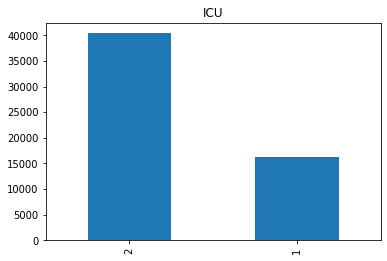

In [127]:
lst=df.columns
for i in range(19):
    print(df[lst[i]].value_counts().to_frame())
    df[lst[i]].value_counts().plot.bar()
    plt.title(lst[i])


In [128]:
df.describe()

Sex  patient type  ...        Result           ICU
count  40380.0       40380.0  ...  40380.000000  40380.000000
mean       1.0           2.0  ...      1.404309      1.883853
std        0.0           0.0  ...      0.490764      0.320405
min        1.0           2.0  ...      1.000000      1.000000
25%        1.0           2.0  ...      1.000000      2.000000
50%        1.0           2.0  ...      1.000000      2.000000
75%        1.0           2.0  ...      2.000000      2.000000
max        1.0           2.0  ...      2.000000      2.000000

[8 rows x 19 columns]

In [129]:
 df.head()

Sex  patient type  Intubed  ...  Contact_OTHER_COVID_Pateint  Result  ICU
16     1             2        2  ...                            2       1    2
27     1             2        2  ...                            1       1    2
94     1             2        2  ...                            1       2    2
102    1             2        2  ...                            1       2    2
110    1             2        2  ...                            1       2    2

[5 rows x 19 columns]

## **CORRELATION HEATMAPS**

Text(0.5, 1.0, 'Correlation heatmap')

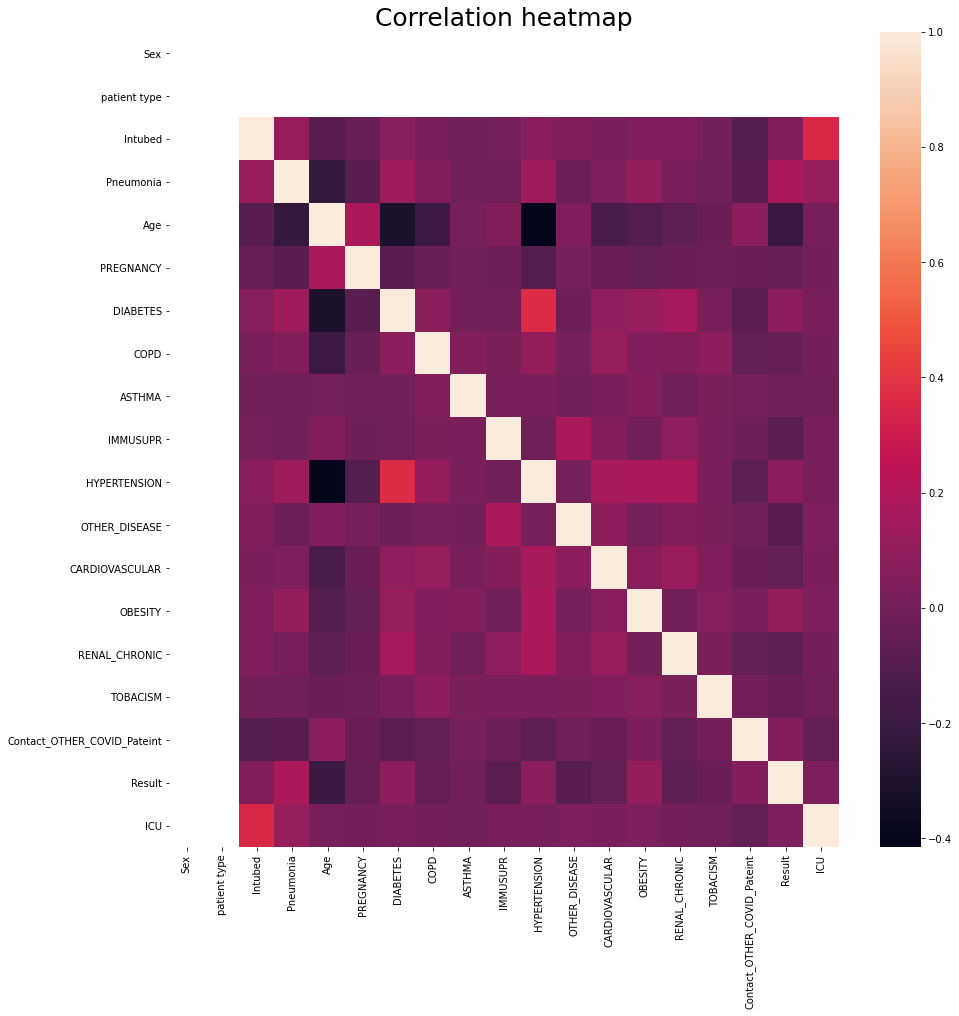

In [130]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())
plt.title('Correlation heatmap',size=25)

## **CLEANED DATA VISUALIZATION**

In [131]:
features=['Intubed', 'Pneumonia', 'Age', 'PREGNANCY',
       'DIABETES', 'COPD', 'ASTHMA', 'IMMUSUPR', 'HYPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACISM', 'Contact_OTHER_COVID_Pateint', 'Result']
list(enumerate(features))

[(0, 'Intubed'),
 (1, 'Pneumonia'),
 (2, 'Age'),
 (3, 'PREGNANCY'),
 (4, 'DIABETES'),
 (5, 'COPD'),
 (6, 'ASTHMA'),
 (7, 'IMMUSUPR'),
 (8, 'HYPERTENSION'),
 (9, 'OTHER_DISEASE'),
 (10, 'CARDIOVASCULAR'),
 (11, 'OBESITY'),
 (12, 'RENAL_CHRONIC'),
 (13, 'TOBACISM'),
 (14, 'Contact_OTHER_COVID_Pateint'),
 (15, 'Result')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

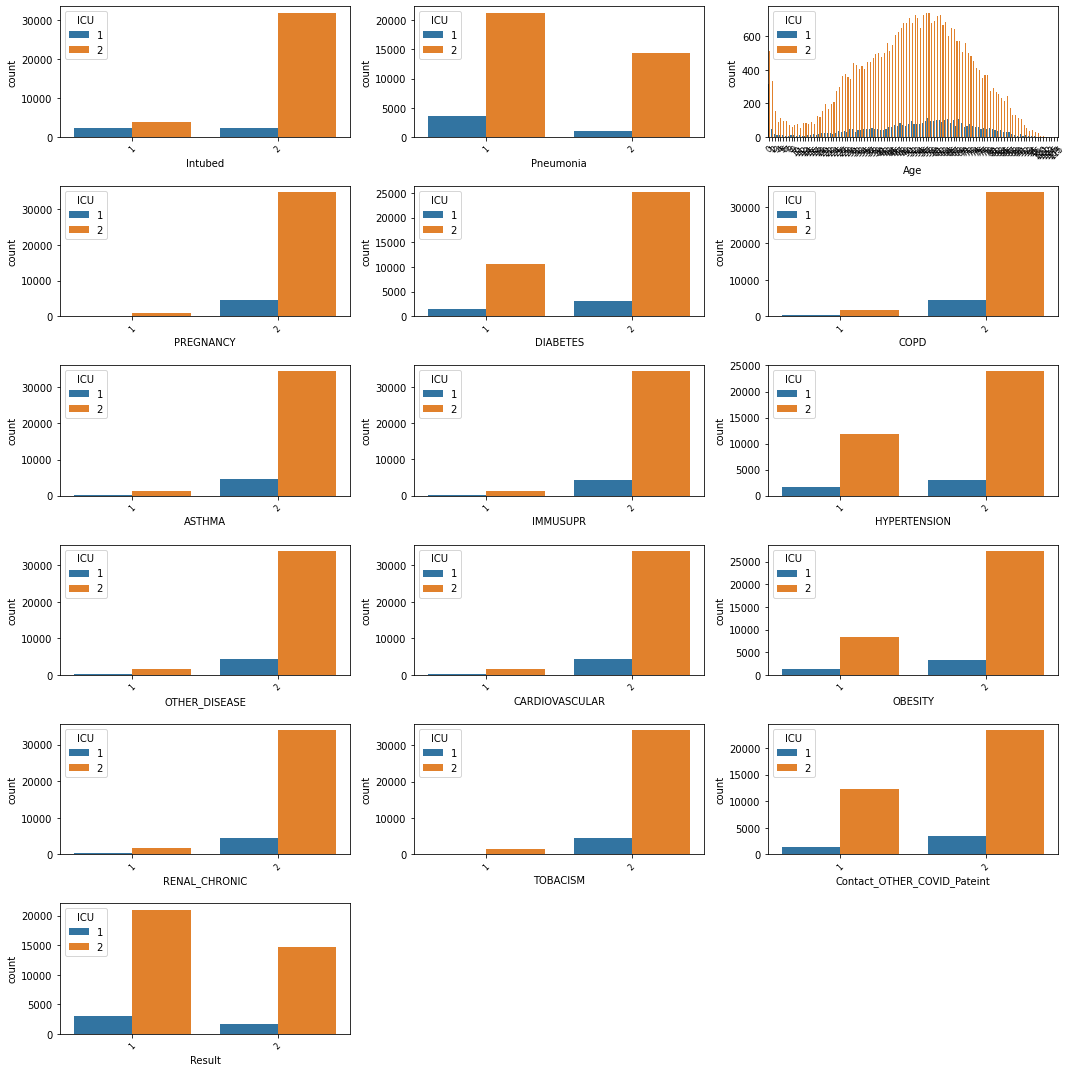

In [132]:
plt.figure(figsize=(15,15))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='ICU',data=df)
    plt.xticks(rotation=45,size=8)
    plt.tight_layout()  

## **DATA TRAINING**

In [133]:
train=df[['Intubed', 'Pneumonia', 'Age', 'PREGNANCY',
       'DIABETES', 'COPD', 'ASTHMA', 'IMMUSUPR', 'HYPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACISM', 'Contact_OTHER_COVID_Pateint', 'Result']]
test=df['ICU']
train=train.values
test=np.array(test)


In [134]:
X_train, X_test, y_train, y_test = train_test_split(train, test, shuffle=True, random_state=99, test_size=0.30)
print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  28266
Number of test samples:  12114


In [135]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **DECISION TREE**

In [144]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from graphviz import Source
from IPython.display import Image
from IPython.display import display
from ipywidgets import interactive

In [146]:
classifier3 = DecisionTreeClassifier()
classifier3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.16896 to fit


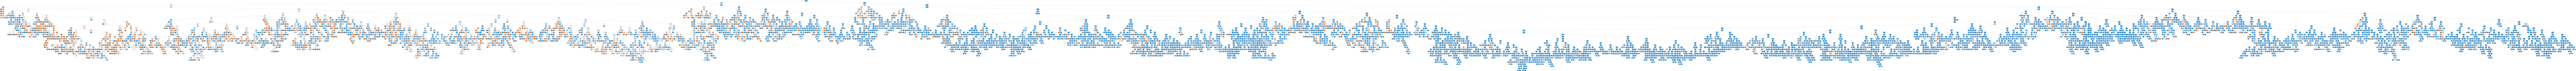

In [149]:
graph = Source(export_graphviz(classifier3, out_file=None,  class_names=['1', '2'] , filled = True))
display(Image(graph.pipe(format='png')))


Accuracy:  0.8439821693907875
Macro F1 score:  0.5939438460185127


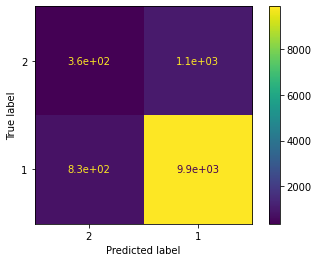

In [151]:
y_pred3 = classifier3.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred3))
print("Macro F1 score: ", f1_score(y_test,y_pred3,average='macro'))
class_labels3 = df['ICU'].unique()
cm3 = confusion_matrix(y_test, y_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=class_labels3)
disp3.plot()

In [169]:
DT_acc=accuracy_score(y_test,y_pred3)

## **SVM**

In [137]:
from sklearn import svm
from sklearn.svm import SVC

In [138]:
classifier2 = SVC()
classifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [139]:
y_pred2 = classifier2.predict(X_test)

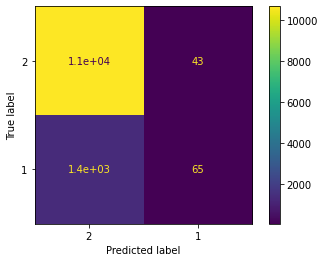

In [140]:
class_labels2 = df['ICU'].unique()
cm2 = confusion_matrix(y_test, y_pred2, labels=class_labels2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_labels2)
disp2.plot()

In [141]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.60      0.05      0.09      1421
           2       0.89      1.00      0.94     10693

    accuracy                           0.88     12114
   macro avg       0.74      0.52      0.51     12114
weighted avg       0.85      0.88      0.84     12114



In [142]:
logReg_score2=metrics.accuracy_score(y_test, y_pred2)
print(logReg_score2)

0.884513785702493


## **LOGISTIC REGRESSION**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve
from sklearn import metrics

In [66]:
classifier1 = LogisticRegression(penalty='l2', tol=1e-6, max_iter=1000000)
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [67]:
y_pred = classifier1.predict(X_test)

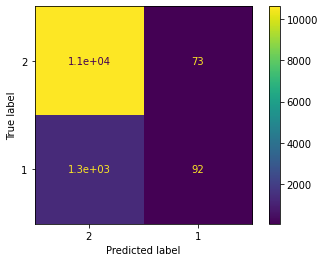

In [68]:
class_labels = df['ICU'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
sns.reset_orig()
disp.plot()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.06      0.12      1421
           2       0.89      0.99      0.94     10693

    accuracy                           0.88     12114
   macro avg       0.72      0.53      0.53     12114
weighted avg       0.85      0.88      0.84     12114



In [70]:
logReg_score=metrics.accuracy_score(y_test, y_pred)

In [74]:
print(logReg_score)

0.8842661383523196


In [75]:
classifier1.coef_

array([[ 0.76057416,  0.35140027,  0.25985604,  0.06364632,  0.01643373,
         0.03893212, -0.02088381,  0.03415321,  0.0138729 ,  0.04993283,
         0.06108365,  0.0732241 ,  0.00707988, -0.04636819, -0.03772244,
         0.05099579]])

**Feature Selection**

In [78]:
from sklearn.feature_selection import RFE

In [87]:
selector = RFE(classifier1, n_features_to_select=14, step=1)
selector = selector.fit(df.drop('ICU',axis=1),df['ICU'])
display(selector)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=1000000,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=1e-06,
                                 verbose=0, warm_start=False),
    n_features_to_select=14, step=1, verbose=0)

In [88]:
selector.support_
    
selector.ranking_


array([4, 3, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [89]:
df1 = df

In [90]:
df1

Sex  patient type  Intubed  ...  Contact_OTHER_COVID_Pateint  Result  ICU
16         1             2        2  ...                            2       1    2
27         1             2        2  ...                            1       1    2
94         1             2        2  ...                            1       2    2
102        1             2        2  ...                            1       2    2
110        1             2        2  ...                            1       2    2
...      ...           ...      ...  ...                          ...     ...  ...
1048417    1             2        2  ...                            2       1    2
1048443    1             2        2  ...                            2       2    2
1048506    1             2        2  ...                            2       1    2
1048515    1             2        2  ...                            2       1    2
1048564    1             2        2  ...                            2       2    2

[40380 rows x 19 columns]

In [91]:
df1.drop(columns={'Sex','patient type','Age', 'COPD'},axis=1,inplace=True)
df1.shape

(40380, 15)

In [92]:
df1

Intubed  Pneumonia  ...  Result  ICU
16             2          1  ...       1    2
27             2          2  ...       1    2
94             2          1  ...       2    2
102            2          2  ...       2    2
110            2          1  ...       2    2
...          ...        ...  ...     ...  ...
1048417        2          1  ...       1    2
1048443        2          2  ...       2    2
1048506        2          2  ...       1    2
1048515        2          1  ...       1    2
1048564        2          1  ...       2    2

[40380 rows x 15 columns]

In [93]:
df

Intubed  Pneumonia  ...  Result  ICU
16             2          1  ...       1    2
27             2          2  ...       1    2
94             2          1  ...       2    2
102            2          2  ...       2    2
110            2          1  ...       2    2
...          ...        ...  ...     ...  ...
1048417        2          1  ...       1    2
1048443        2          2  ...       2    2
1048506        2          2  ...       1    2
1048515        2          1  ...       1    2
1048564        2          1  ...       2    2

[40380 rows x 15 columns]

In [95]:
train1=df1[['Intubed', 'Pneumonia', 'PREGNANCY',
       'DIABETES', 'ASTHMA', 'IMMUSUPR', 'HYPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACISM', 'Contact_OTHER_COVID_Pateint', 'Result']]
test1=df1['ICU']
train1=train1.values
test1=np.array(test)

In [96]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train1, test1, shuffle=True, random_state=99, test_size=0.30)
print("Number of train samples: ", len(X_train1))
print("Number of test samples: ", len(X_test1))

Number of train samples:  28266
Number of test samples:  12114


In [97]:
scaler1 = StandardScaler()
scaler1.fit(X_train1)
X_train1 = scaler1.transform(X_train1)
X_test1 = scaler1.transform(X_test1)

In [99]:
classifier11 = LogisticRegression(penalty='l2', tol=1e-6, max_iter=1000000)
classifier11.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [100]:
y_pred1 = classifier11.predict(X_test1)

              precision    recall  f1-score   support

           1       0.46      0.02      0.04      1421
           2       0.88      1.00      0.94     10693

    accuracy                           0.88     12114
   macro avg       0.67      0.51      0.49     12114
weighted avg       0.83      0.88      0.83     12114



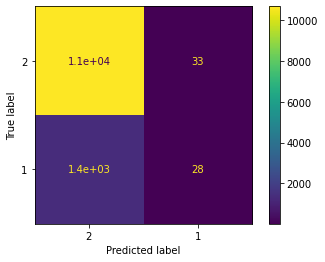

In [101]:
class_labels1 = df['ICU'].unique()
cm1 = confusion_matrix(y_test1, y_pred1, labels=class_labels1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_labels1)
sns.reset_orig()
disp1.plot()
print(classification_report(y_test1, y_pred1))

In [102]:
logReg_score1=metrics.accuracy_score(y_test1, y_pred1)
print(logReg_score1)

0.8822849595509328


## **Softmax Regression**

In [152]:
classifier4 = LogisticRegression(multi_class='multinomial', penalty='l2', tol=1e-6, max_iter=10000)
classifier4.fit(X_train, np.squeeze(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [153]:
y_pred4 = classifier4.predict(X_test)

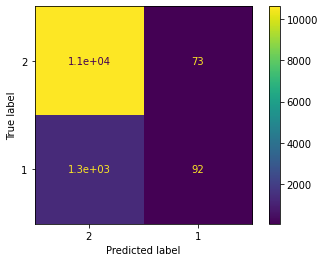

In [154]:
class_labels4 = df['ICU'].unique()
cm4 = confusion_matrix(y_test, y_pred4, labels=class_labels4)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=class_labels4)
sns.reset_orig()
disp4.plot()

In [155]:
print("Accuracy: ", accuracy_score(y_test,y_pred4))

Accuracy:  0.8842661383523196


## **KNN** 

In [157]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy:  0.8782400528314347
Accuracy:  0.8806339772164438
Accuracy:  0.8797259369324748
Accuracy:  0.8807165263331682
Accuracy:  0.8803863298662704


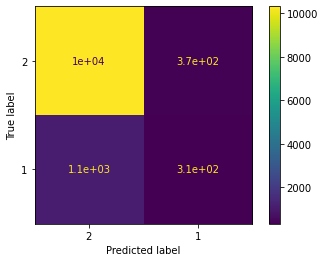

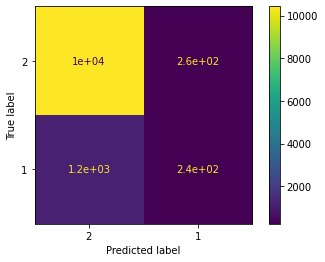

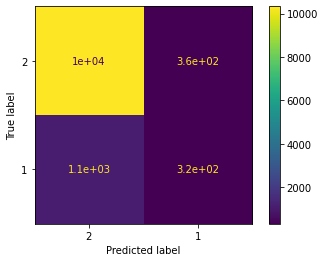

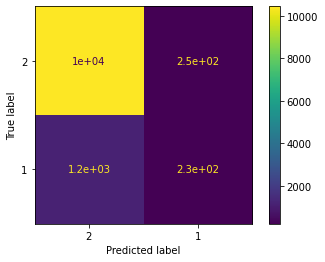

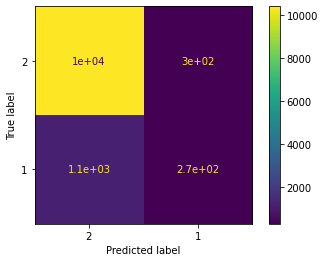

In [160]:
for i in range (10, 15):
  neighbour = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  y_pred5 = neighbour.predict(X_test)
  class_labels5 = df['ICU'].unique()
  cm5 = confusion_matrix(y_test, y_pred5, labels=class_labels5)
  disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=class_labels5)
  sns.reset_orig()
  disp5.plot()
  print("Accuracy: ", accuracy_score(y_test,y_pred5))

## **RANDOM FOREST**

In [161]:
from sklearn.ensemble import RandomForestClassifier


In [162]:
classifier6 = RandomForestClassifier(n_estimators=100)
classifier6.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
y_pred6 = classifier6.predict(X_test)

Accuracy:  0.8651972923889715


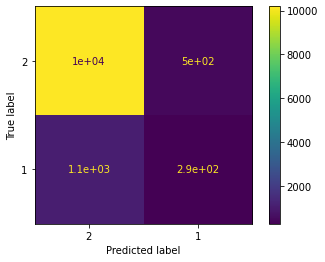

In [164]:
class_labels6 = df['ICU'].unique()
cm6 = confusion_matrix(y_test, y_pred6, labels=class_labels6)
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=class_labels6)
sns.reset_orig()
disp6.plot()
print("Accuracy: ", accuracy_score(y_test,y_pred6))

## **ADABOOST CLASSIFIER**

In [165]:
from sklearn.ensemble import AdaBoostClassifier

In [166]:
classifier7 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=50)
classifier7.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [167]:
y_pred7 = classifier7.predict(X_test)

Accuracy:  0.8850090804028397


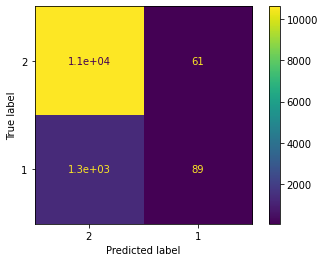

In [168]:
class_labels7 = df['ICU'].unique()
cm7 = confusion_matrix(y_test, y_pred7, labels=class_labels7)
disp7 = ConfusionMatrixDisplay(confusion_matrix=cm7, display_labels=class_labels7)
sns.reset_orig()
disp7.plot()
print("Accuracy: ", accuracy_score(y_test,y_pred7))